# Assignment 3

The goal of assignment 3 is for your learn TD-IDF, cosine similarity, and embedding. 

Here are four types of data (i.e. four categories of lyrics)
* https://slpcourse.github.io/materials/lyrics/country.txt
* https://slpcourse.github.io/materials/lyrics/pop.txt
* https://slpcourse.github.io/materials/lyrics/rap.txt
* https://slpcourse.github.io/materials/lyrics/rock.txt

Each song is segmented by `<SONG_BOUNDARY>`

## Task 1: TF-IDF [25 marks]

Implement the TF-IDF algorithm. You need to write your own compute_tf, and compute_idf functions.

In [3]:
# impement your TF-IDF algorithms here


import urllib.request
import regex as re
from collections import Counter 
import numpy as np
#读取并打印网页
fp = urllib.request.urlopen(r'https://slpcourse.github.io/materials/lyrics/country.txt')
content1 = fp.read().decode("utf-8")
fp.close()

fp = urllib.request.urlopen(r'https://slpcourse.github.io/materials/lyrics/pop.txt')
content2 = fp.read().decode("utf-8")
fp.close()

fp = urllib.request.urlopen(r'https://slpcourse.github.io/materials/lyrics/rap.txt')
content3 = fp.read().decode("utf-8")
fp.close()

fp = urllib.request.urlopen(r'https://slpcourse.github.io/materials/lyrics/rock.txt')
content4 = fp.read().decode("utf-8")
fp.close()

#定义标准化函数
def normalize(raw_text):
  '''
  功能：标准化文档
  raw_text：未经处理的文档

  '''
  #将\n替换为空格
  raw_text = re.sub("\n"," ",raw_text)
  #将特殊字符替换为空格并将单词改为小写
  p=re.compile(r'[-,$()#+&*/?!]')
  raw_text = re.sub(p," ",raw_text).lower()

  return(raw_text)
#切割文本
content1 = normalize(content1).split("<song_boundary>")
content2 = normalize(content2).split("<song_boundary>")
content3 = normalize(content3).split("<song_boundary>")
content4 = normalize(content4).split("<song_boundary>")

In [4]:
#创建双层列表，表示歌词
songs_list = content1 + content2 + content3 + content4
new_songs_list = []
for song in songs_list:

  if len(song)>2:
    new_songs_list.append(song.split())

print(new_songs_list[0])
print(new_songs_list[0][:10])
print(len(new_songs_list))

['i', "couldn't", 'help', 'but', 'overhear', 'you', 'talking', 'to', 'yourself', 'how', 'she', 'slipped', 'right', 'through', 'your', 'hands', 'and', 'in', 'between', 'all', 'of', 'the', 'four', 'letter', 'words', 'you', 'said', 'your', 'never', 'gonna', 'understand', 'you', 'gave', 'her', 'everything', 'you', 'thought', 'she', 'ever', 'wanted', 'now', 'all', 'you', 'want', 'is', 'gone', 'your', 'just', 'one', 'of', 'many', 'broken', 'hearted', 'wondering', 'what', 'went', 'wrong', 'welcome', 'to', 'the', 'club', "don't", 'be', 'thinking', "you're", 'the', 'only', 'one', "who's", 'heart', 'was', 'in', 'a', 'hit', 'and', 'run', 'while', 'you', 'looked', 'the', 'other', 'way', 'as', "you're", 'howling', 'at', 'the', 'moon', 'take', 'a', 'look', 'around', 'the', 'room', 'at', 'all', 'your', 'fellow', 'fools', 'of', 'love', 'welcome', 'to', 'the', 'club', 'over', 'in', 'the', 'corner', 'is', "ol'", 'larry', 'john', 'getting', 'over', 'wife', 'number', 'two', 'and', 'sitting', 'next', 'to',

In [5]:
#创建单词表
words_list = []
for song in new_songs_list:
  for word in song:
    words_list.append(word)

unique_words = np.unique(words_list)

In [ ]:
def compute_tf(doc):
  '''

  功能：计算全部单词在doc中的terms frequency
  doc : 要计算的文档

  '''
  term_freq = []
  for word in unique_words:

    term_freq.append(np.log10(doc.count(word)+1))

  return (term_freq)

#-------test-----------
#第一首歌所有单词的trem_freq
compute_tf(new_songs_list[0])


In [ ]:
#构造term_freq矩阵
x=[]
k=0
for song in new_songs_list:
  print(k)
  k = k+1
  term_freq = compute_tf(song)
  x.append(term_freq)

In [8]:
#term freq 矩阵
X  = np.array(x).T
np.shape(X)


(14485, 1176)

In [9]:
#定义idf函数
def compute_idf(word):
  '''

  功能：计算word的doucument freq
  word : 单词

  '''
  freq = 0
  for song in new_songs_list:

    if word in song:
      freq = freq+1
  freq = np.log10(len(new_songs_list)/freq)
  return(freq)
#------test---------
compute_idf(unique_words[0])

1.2922560713564761

In [ ]:
#创建idf列表
y = []
k = 0
for word in unique_words :
  print(k)
  k = k+1
  y.append(compute_idf(word))


In [11]:
Y = np.array(y)
np.shape(Y)

(14485,)

In [ ]:
#生成tf-idf矩阵
for i in range(np.shape(X)[0]):
  X[i,:]=X[i,:].dot(Y[i])

## Task 2: Kmeans clustering [45 marks]

Perform kmeans clustering with the TF-IDF weights. You need to initialize the kmeans centroid in two different ways: random initialization, and smart initialization where you initialize the centroid with a vector from each category.

Here are your tasks

*   Visualize the clustering results from random initialization. each cluster need to have its own color, and highlight the centroid
*   Visualize the clustering results from smart initialization. each cluster need to have its own color, and highlight the centroid
*   Calculate the cosine similarity of the kmeans centroid from smart initialization. Present your result in a table
*   Discuss the difference and your observation

You may use scikit-learn for kmeans clustering and t-SNE visualization



In [12]:
# implement task 2 here
#生成tf-idf矩阵
for i in range(np.shape(X)[0]):
  X[i,:]=X[i,:].dot(Y[i])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


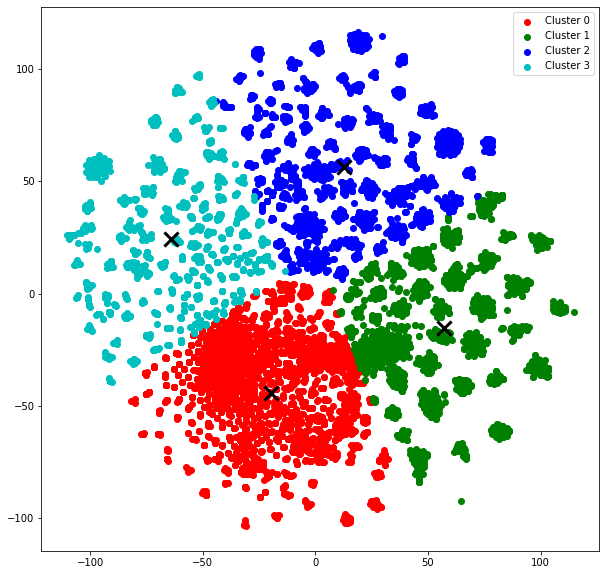

In [13]:
from scipy.sparse import dok_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=50, random_state=0)
X_pca = pca.fit_transform(X)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

# 使用KMeans进行聚类
k = 4
kmeans = KMeans(n_clusters=k, random_state=0,init='random')
labels = kmeans.fit_predict(X_tsne)
centers = kmeans.cluster_centers_

# 绘制聚类结果的散点图
plt.figure(figsize=(10, 10))
colors = ['r', 'g', 'b', 'c']
for i in range(k):
    plt.scatter(X_tsne[labels==i, 0], X_tsne[labels==i, 1], c=colors[i], label='Cluster {}'.format(i))
    centroid = centers[i]
    plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=200, linewidths=3)
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


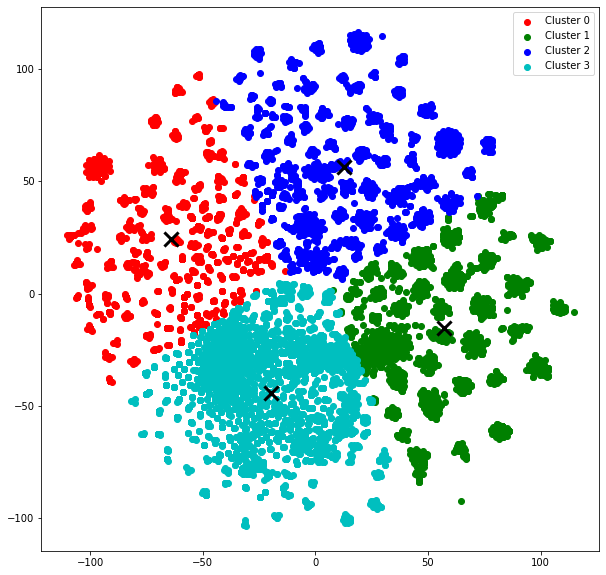

In [14]:
from scipy.sparse import dok_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# 使用PCA进行降维
pca = PCA(n_components=50, random_state=0)
X_pca = pca.fit_transform(X)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

# 使用KMeans进行聚类
k = 4
kmeans = KMeans(n_clusters=k, random_state=0,init='k-means++')
labels = kmeans.fit_predict(X_tsne)
centers = kmeans.cluster_centers_

# 绘制聚类结果的散点图
plt.figure(figsize=(10, 10))
colors = ['r', 'g', 'b', 'c']
for i in range(k):
    plt.scatter(X_tsne[labels==i, 0], X_tsne[labels==i, 1], c=colors[i], label='Cluster {}'.format(i))
    centroid = centers[i]
    plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=200, linewidths=3)
plt.legend()
plt.show()

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算聚类中心的余弦相似度
similarity = cosine_similarity(centers)
np.fill_diagonal(similarity, np.nan)

# 打印余弦相似度矩阵
print('Cosine Similarity Matrix of Cluster Centers:\n', similarity)

Cosine Similarity Matrix of Cluster Centers:
 [[        nan -0.9949427   0.13631195  0.05521061]
 [-0.9949427          nan -0.03611564 -0.1552227 ]
 [ 0.13631195 -0.03611564         nan -0.9816291 ]
 [ 0.05521061 -0.1552227  -0.9816291          nan]]


**difference** : 无显著差异

##Task 3: Kmeans clustering with Word2vec or BERT embedding [30 marks]

Similar to task 2, but perform kmeans clustering with word2vec or BERT embedding.
Here are your tasks

*   Visualize the clustering results from random initialization. each cluster need to have its own color, and highlight the centroid
*   Visualize the clustering results from smart initialization. each cluster need to have its own color, and highlight the centroid
*   Discuss the difference and your observation

You may use scikit-learn for kmeans clustering and t-SNE visualization



In [ ]:
# implement task 3 here

In [26]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# 训练Word2Vec模型
model = Word2Vec(new_songs_list, min_count=1, size=1000, window=5, iter=50)

Z = model.wv[model.wv.vocab]


In [ ]:
#保存模型
model.save( 'word2vec_model.w2v' )

In [35]:
def getVector_v4(song, model):
        i = 0
        index2word_set = set(model.wv.index2word)
        article_vector = np.zeros((model.layer1_size))
        for word in song:
                if word in index2word_set:
                        article_vector = np.add(article_vector, model.wv[word])
                        i += 1
        cutWord_vector = np.divide(article_vector, i)
        return cutWord_vector

In [ ]:
vector_list = []
i = 0
for song in new_songs_list:
        i += 1
        print(i)
 
        vector_list.append( getVector_v4(song, model) )
 
Z = np.array(vector_list)

In [37]:
np.shape(Z)

(1176, 1000)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


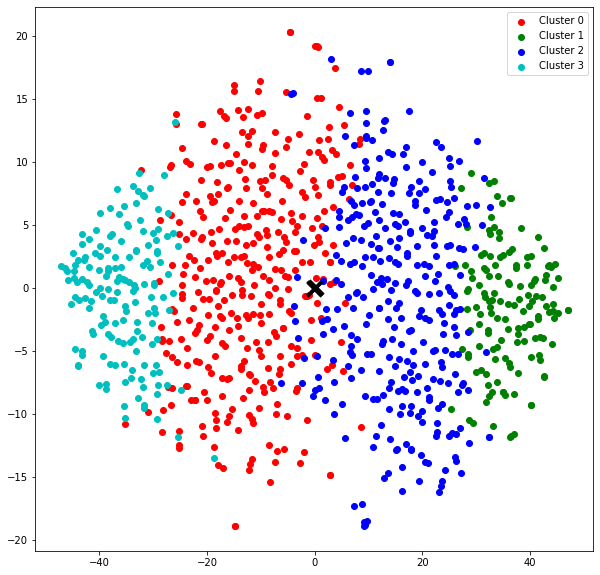

In [42]:
# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=0)
Z_tsne = tsne.fit_transform(Z.T)

# 使用KMeans进行聚类
k = 4
kmeans = KMeans(n_clusters=k, random_state=0, init='random')
labels = kmeans.fit_predict(Z.T)
centers = kmeans.cluster_centers_

# 绘制聚类结果的散点图
plt.figure(figsize=(10, 10))
colors = ['r', 'g', 'b', 'c']
for i in range(k):
    plt.scatter(Z_tsne[labels==i, 0], Z_tsne[labels==i, 1], c=colors[i], label='Cluster {}'.format(i))
    centroid = centers[i]
    plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=200, linewidths=3)
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


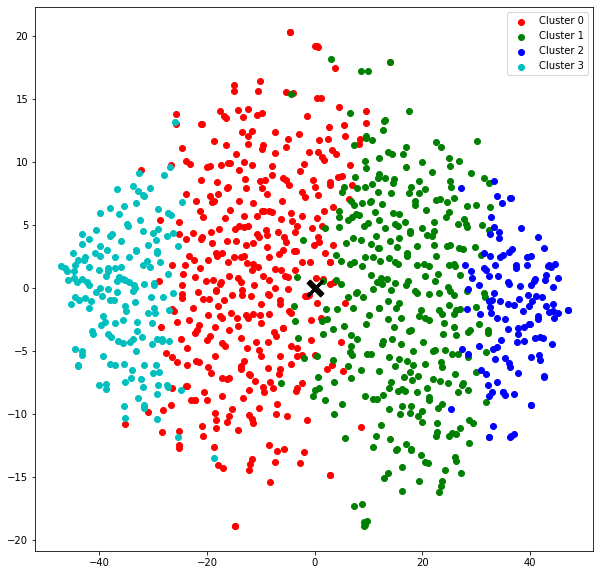

In [43]:
# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=0)
Z_tsne = tsne.fit_transform(Z.T)

# 使用KMeans进行聚类
k = 4
kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
labels = kmeans.fit_predict(Z.T)
centers = kmeans.cluster_centers_

# 绘制聚类结果的散点图
plt.figure(figsize=(10, 10))
colors = ['r', 'g', 'b', 'c']
for i in range(k):
    plt.scatter(Z_tsne[labels==i, 0], Z_tsne[labels==i, 1], c=colors[i], label='Cluster {}'.format(i))
    centroid = centers[i]
    plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=200, linewidths=3)
plt.legend()
plt.show()

**difference**：无显著差异